<a href="https://colab.research.google.com/github/amitagar1/EVA2.0/blob/master/EVA2_Session2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Not an ideal network**

**Installing Keras Package**

In [1]:
# https://keras.io/
!pip install -q keras
import keras

Using TensorFlow backend.


**Installing Depenendcies to Run Classification Problem on MNIST dataset**

In [0]:
import numpy as np

from keras.models import Sequential
from keras.layers import Flatten
from keras.layers import Convolution2D
from keras.utils import np_utils

from keras.datasets import mnist

**Loading MNIST Dataset and Splitting in Traininga and Test Set**

In [3]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11493376/11490434 [==============================] - 1s 0us/step


#### Printing the dimensions of training dataset and displaying 1st Image in Dataset 

(60000, 28, 28)


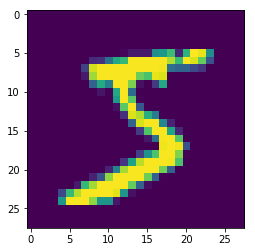

In [4]:
print (X_train.shape)
from matplotlib import pyplot as plt
%matplotlib inline
plt.imshow(X_train[0])

In [7]:
print(X_train[0].shape)

(28, 28)


In [0]:
plt.imshow(X_train[0])

**Changing the dimension of the Images from 2D to 3D**

In [0]:
X_train = X_train.reshape(X_train.shape[0], 28, 28,1)
X_test = X_test.reshape(X_test.shape[0], 28, 28,1)

In [15]:
print(X_train.shape[3])

1


**First Making datatype to float type and then Normalizing the pixel value**

In [0]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [25]:
print(X_train[0].shape)

(28, 28, 1)


**Taking the label column in y_train object**

In [0]:
y_train[:10]

In [20]:
y_train[0:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

###Convert 1-dimensional class arrays to 10-dimensional class matrices

In [0]:
# Convert 1-dimensional class arrays to 10-dimensional class matrices
Y_train = np_utils.to_categorical(y_train, 10)
Y_test = np_utils.to_categorical(y_test, 10)

In [27]:
Y_train[0:10]


array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [56]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 
model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

# Receptive Filed = 3
# Input channel dimensions = 28x28x1

model.add(Convolution2D(64, 3,3, activation='relu'))
# Receptive Filed = 5
# Input channel dimensions = 26x26x32

model.add(Convolution2D(128, 3, 3, activation='relu'))
# Receptive Filed = 7
# Input channel dimensions = 24x24x64

model.add(MaxPooling2D(pool_size=(2, 2)))
# Receptive Filed = 14
# Input channel dimensions = 22x22x128

model.add(Convolution2D(256, 3, 3, activation='relu'))
# Receptive Filed = 16
# Input channel dimensions = 11x11x128

model.add(Convolution2D(512, 3, 3, activation='relu'))
# Receptive Filed = 18
# Input channel dimensions = 9x9x256

model.add(Convolution2D(1024, 3, 3, activation='relu'))
# Receptive Filed = 20
# Input channel dimensions = 7x7x512

model.add(Convolution2D(2048, 3, 3, activation='relu'))
# Receptive Filed = 22
# Input channel dimensions = 5x5x1024

model.add(Convolution2D(10, 3, 3,activation='relu'))
# Receptive Filed = 24
# Input channel dimensions = 3x3x2048

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_81 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_82 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_83 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_84 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_85 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_86 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  after removing the cwd from sys.path.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:8: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), activation="relu")`
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:11: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(128, (3, 3), activation="relu")`
  # This is added back by InteractiveShellApp.init_path()
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:17: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(256, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:20: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(512, (3, 3), activation="relu")`
/usr/local/lib/python3.6/dist-packages/ipykernel_la

###Compling the model and slecting loss function and optimizer

In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

### Training the model

In [58]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


Epoch 1/10
60000/60000 [==============================] - 220s 4ms/step - loss: 2.3027 - acc: 0.0988
Epoch 2/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 3/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 4/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 5/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 6/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 7/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 8/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 9/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3026 - acc: 0.0987
Epoch 10/10
60000/60000 [==============================] - 218s 4ms/step - loss: 2.3026 - a

### Evaluating the model performnace on the test data set

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)

###Printing the Evalaution Score

In [60]:
print(score)

[2.3025851249694824, 0.098]


### Predicitng the values on Test data set

In [0]:
y_pred = model.predict(X_test)

### Printing the Actual and Predicted values 

In [62]:
print(y_pred[:9])
print(y_test[:9])

[[0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]
 [0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1 0.1]]
[7 2 1 0 4 1 4 9 5]


##In the Above model there are 2 issues 

**1. There we have added extra dimension in the Convolution2D function while defining the shape dimensions. Either we can put under bracket or remove one dimension Eg, Instead of 32, 3,3, we should do (3,3) or just 3**

**2, We have used non-linaer function ReLu at the last layer of CNN which is not required as at this layer we have already extracted all the features of the object to classify the object. This will reduce the accuracy of the overall network t**

**Below model is trained with the same architecture with higher accuracy after removing the non-linear function**

In [63]:
from keras.layers import Activation, MaxPooling2D

model = Sequential() 

model.add(Convolution2D(32, 3, 3, activation='relu', input_shape=(28,28,1)))

model.add(Convolution2D(64, (3,3), activation='relu'))

model.add(Convolution2D(128, (3, 3), activation='relu'))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Convolution2D(256, (3, 3), activation='relu'))

model.add(Convolution2D(512, (3, 3), activation='relu'))

model.add(Convolution2D(1024, (3, 3), activation='relu'))

model.add(Convolution2D(2048, (3, 3), activation='relu'))

model.add(Convolution2D(10, (3, 3),activation='relu'))

model.add(Flatten())
model.add(Activation('softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_89 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_90 (Conv2D)           (None, 24, 24, 64)        18496     
_________________________________________________________________
conv2d_91 (Conv2D)           (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 11, 11, 128)       0         
_________________________________________________________________
conv2d_92 (Conv2D)           (None, 9, 9, 256)         295168    
_________________________________________________________________
conv2d_93 (Conv2D)           (None, 7, 7, 512)         1180160   
_________________________________________________________________
conv2d_94 (Conv2D)           (None, 5, 5, 1024)        4719616   
__________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1...)`
  """


In [0]:
model.compile(loss='categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [0]:
model.fit(X_train, Y_train, batch_size=32, nb_epoch=10, verbose=1)

In [0]:
score = model.evaluate(X_test, Y_test, verbose=0)
print(score)

In [0]:
y_pred = model.predict(X_test)
print(y_pred[:9])
print(y_test[:9])